## Question 1

In [1]:
import numpy as np
from scipy.optimize import minimize


## Nelder-Mead Simplex 

In [2]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
    
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571


####  Changed $x_0$

In [3]:
def rosen(x):
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)
    
x0 = np.array([1.0, 0.4, 0.5, 1.6, 0.9])

res = minimize(rosen, x0, method='nelder-mead', options={'xatol': 1e-8, 'disp': True})


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 445
         Function evaluations: 730


Using the difference of 0.3 for each in $x_0.$ Soch that the new $x_0$ is $[1.0, 0.4, 0.5, 1.6, 0.9].$ It is observed that the number of iteration increase from $339$ to $445$ and the function evaluation increases from $571$ to $730.$ This show higher values of $x_0$ implies less iteration and less function evaluation, while lower values of $x_0$ implies higher iteration and higher function evaluation.

## Broyden-Fletcher-Goldfarb-Shanno algorithm 

In [4]:
def rosen_der(x):
    xm = x[1:-1]
    xm_m1 = x[:-2]
    xm_p1 = x[2:]
    der = np.zeros_like(x)
    der[1:-1] = 200*(xm-xm_m1**2) - 400*(xm_p1 - xm**2)*xm - 2*(1-xm)
    der[0] = -400*x[0]*(x[1]-x[0]**2) - 2*(1-x[0])
    der[-1] = 200*(x[-1]-x[-2]**2)
    return der

x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

res = minimize(rosen, x0, method='BFGS', jac=rosen_der, options={'disp': True})
               


Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 25
         Function evaluations: 30
         Gradient evaluations: 30


In Broyden-Fletcher-Goldfarb-Shanno algorithm, the solution converges fast than in th case of Nelder-Mead simplest algorithm. The method uses the gradient of the objective function to compute the solution. The BFGS method  requires fewer function calls than the simplex algorithm even when the gradient must be estimated.

The Nelder-Mead simplest algorithm is the easier way to minimize a fairly well-behaved function. It requires only function evaluations and is a good choice for simple minimization problems.

## Quetion 2

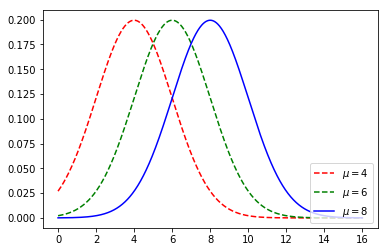

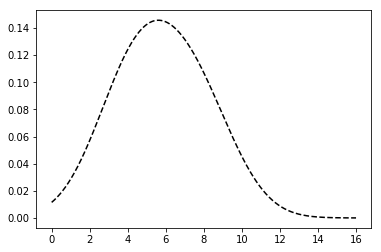

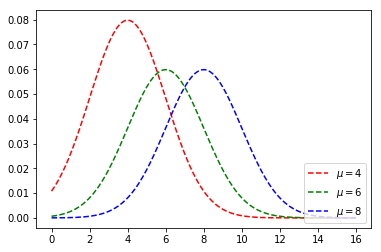

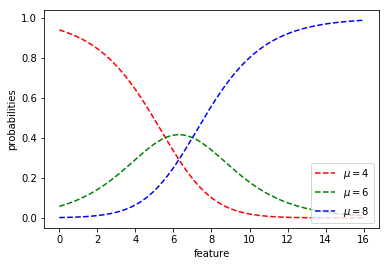

In [24]:
#Bayes example for Python3
import numpy as np
from scipy.stats import norm
import pylab as P
import matplotlib.pyplot as plt


# Bayes decision theory
# we define three univariate normal distributions p1,p2,p3
# with prior probabilities P1,P2,P3
# P3 = 0.3

N=1000;

# Prior probabilities
P1=0.4;
P2=0.3;
P3=1-P1-P2;

# Definitions of three normals
grid = P.linspace(0,16,N)

# Class conditional densities p(x|c)
P.figure(1)
mean1 =  4
sigma1 = 2

y1 = norm.pdf(grid, mean1, sigma1 )
l = P.plot(grid, y1, 'r--', label='$\mu = 4$', linewidth=1.5)
leg = plt.legend(loc='lower right')

mean2 = 6
sigma2 = 2
y2 = norm.pdf(grid, mean2, sigma2 )
l = P.plot(grid, y2, 'g--', label='$\mu = 6$', linewidth=1.5)
leg = plt.legend(loc='lower right')

mean3=8
sigma3=2
y3 = norm.pdf(grid, mean3, sigma3 )
l = P.plot(grid, y3, 'b', label='$\mu = 8$', linewidth=1.5)
leg = plt.legend(loc='lower right')
P.show()

#Evidence p(x)
P.figure(2)
px=(y1*P1+y2*P2+y3*P3)
P.plot( grid, px,'k--', linewidth=1.5)
P.show()

#Likelihood times prior
P.figure(3)
P1X=y1*P1;
P2X=y2*P2;
P3X=y3*P3;

P.plot(grid,P1X,'r--', label='$\mu = 4$', linewidth=1.5)
P.plot(grid,P2X,'g--', label='$\mu = 6$', linewidth=1.5)
P.plot(grid,P3X,'b--', label='$\mu = 8$', linewidth=1.5)
leg = plt.legend(loc='lower right')
P.show()


# posterior class probabilities P(c|x)')
P.figure(4)
P1X=y1*P1/px;
P2X=y2*P2/px;
P3X=y3*P3/px;
#print P1X
#print P2X
#print P3X

P.plot(grid,P1X,'r--', label='$\mu = 4$' ,linewidth=1.5)
P.plot(grid,P2X,'g--', label='$\mu = 6$', linewidth=1.5)
P.plot(grid,P3X,'b--', label='$\mu = 8$', linewidth=1.5)
P.xlabel('feature')
P.ylabel('probabilities')
leg = plt.legend(loc='lower right')
P.show()

The Figure 1 depicts the class conditional densities for different mean with uniform standard deviation. While Figure 2 shows the graph of the normalization factor for the mean of 4. 

The Figure 3 depicts the prior probabilities of 3 state of nature. The peak value for the red curve occur around the value of 0.08, which is the best guess prior probability. The fact that the green and blue with peak around 0.06 spread out and has a smaller peak less than the red curve means that a prior probabilities expressed by the 2 curves are “less certain” about the true value than the curve with the highest peak. The shift in the curve is as a result of the variation in the mean values of the prior probabilities. Also, highly informative prior also leads to a smaller variance of the posterior distribution

The Figure 4 depicts the posterior distributions for the 3 different mean values. The blue curve correspond to the mean value of 8, while the red curve corresponds to the mean value of 4. This shows that the  posterior distribution is highly driven by data. In essence, high data means high posterior. Moreover, a lot of data will dominate the posterior distribution.


## Question 3


In [62]:
from PIL import Image
from PIL import ImageFilter

def filter(image_file):
    im = Image.open(image_file)
    im.show() 
    im = im.filter(ImageFilter.EDGE_ENHANCE)    
    im.save(image_file + "edges.jpg")
    
# Opens the images
im1 = "Albert.jpeg"
im2 = "Universe.jpeg"
filter(im1)
filter(im2)



## Question 4

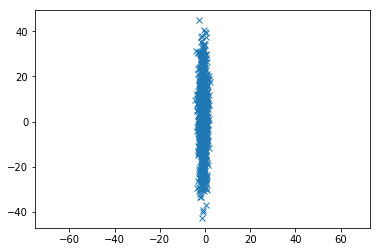

In [26]:
New_mean = [-1,1]
New_cov = [[1,0],[0,200]] # diagonal covariance, points lie on x or y-axis

import matplotlib.pyplot as plt 
import numpy as np
x,y = np.random.multivariate_normal(New_mean,New_cov,1000).T
plt.plot(x,y,'x'); plt.axis('equal'); plt.show()

#### Non symmetric positive definite matrix

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  


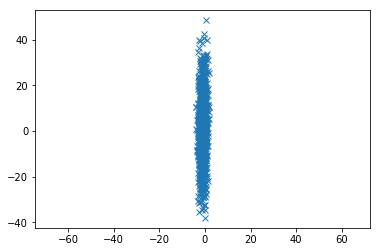

In [27]:
New_mean = [-1,1]
New_cov = [[1,0],[2,200]] # diagonal covariance, points lie on x or y-axis

import matplotlib.pyplot as plt 
import numpy as np
x,y = np.random.multivariate_normal(New_mean,New_cov,1000).T
plt.plot(x,y,'x'); plt.axis('equal'); plt.show()